In [2]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:,[0,2]] #2列目:petal length（花びらの長さ）、3列目:petal width（花びらの幅）
y = iris.target

print('Class labels', np.unique(y))

Class labels [0 1 2]


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)


In [4]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

#X_train_std

In [5]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(n_iter=10, eta0=0.01, random_state=1)

ppn.fit(X_train_std, y_train)

C:\Users\y-kobayashi\Anaconda3\envs\rein-env\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Perceptron(alpha=0.0001, class_weight=None, eta0=0.01, fit_intercept=True,
      max_iter=None, n_iter=10, n_jobs=1, penalty=None, random_state=1,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [6]:
y_pred = ppn.predict(X_test_std)

print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Misclassified samples: %.2f' % ppn.score(X_test_std, y_test))

Misclassified samples: 9
Misclassified samples: 0.80


In [7]:
from sklearn.metrics import accuracy_score

print('Accuracy: %.2f' % accuracy_score(y_test,y_pred))

Accuracy: 0.80


In [8]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:,0].min() -1, X[:,0].max() +1 
    x2_min, x2_max = X[:,1].min() -1, X[:,1].max() +1 
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=colors[idx], label=cl, edgecolor='black')
        
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:,0], X_test[:,1], c='', edgecolor='black', alpha=1.0, linewidth=1, marker='o', s=100, label='test set')

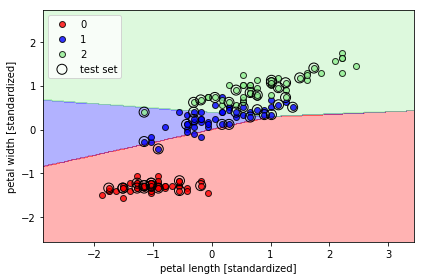

In [11]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105,150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('images/03_01.png', dpi=300)
plt.show()